In [ ]:
import numpy as np
import random as rm
import datetime

# The statespace
states = ["InteracaoArquivo","AcoesNaoAuditadas","IncidentesemRastreabilidade"]

# Possible sequences of events
transitionName = [["IAIA", "IAAA", "IAIR"],["AAIA", "AAAA", "AAIR"],["IRIA", "IRAA", "IRIR"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.10, 0.90, 0.00], [0.02, 0.00, 0.98], [1.00, 0.00, 0.00]]

if (sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[2])) != 3:
    print("Detectado um erro - talvez na matriz de probabilidades?")
else: print("Tudo certo. Vamos em frente. ", (datetime.datetime.now()+datetime.timedelta(hours=-3)), "!!")

Tudo certo. Vamos em frente.  2024-11-07 18:54:51.636080 !!



 G2: Simulação com Markov para Sistema Atual - Sem controle automatizado de Rastreabilidade  [ 2024-11-07 19:08:30.068095 ]
     >> Simulação quantidade de dias =  180
     >> Numero de acessos por dia    =  210



1. A probabilidade de iniciar no estado "Interação com Arquivo" e terminar no estado "Interação com Arquivo" é de ......................: 1.67 %
2. A probabilidade de iniciar no estado "Interação com Arquivo" e terminar no estado "Ações Não Auditadas" é de ...........................: 7.06 %
3. A probabilidade de iniciar no estado "Interação com Arquivo" e terminar no estado "Incidente sem Rastreabilidade" é de ....: 91.27 %




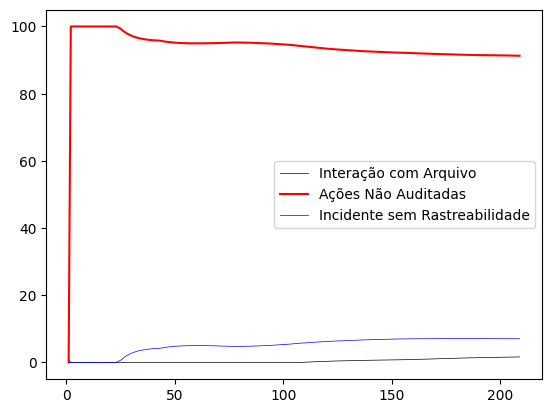

In [ ]:
import numpy as np
import random as rm
import datetime
import matplotlib.pyplot as plt

from types import EllipsisType
#Estados: ["InteracaoArquivo","AcoesNaoAuditadas","IncidentesemRastreabilidade"]
def activity_forecast(actions):
    # Choose the starting state
    activityAction = "InteracaoArquivo"
    activityList = [activityAction]
    i = 0
    prob = 1

    while i != actions:
        #Estado - Solicitação Acesso (["SASA", "SAAM", "SAIR"] => [0.10, 0.90, 0.00])
        #print ("estado = ", activityAction)

        if activityAction == "InteracaoArquivo":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "IAIA":
                prob = prob * 0.10
                activityAction = "InteracaoArquivo"
                activityList.append("InteracaoArquivo")
                pass
            elif change == "IAAA":
                prob = prob * 0.90
                activityAction = "AcoesNaoAuditadas"
                activityList.append("AcoesNaoAuditadas")
            else:
                prob = prob * 0.0
                activityAction = "IncidentesemRastreabilidade"
                activityList.append("IncidentesemRastreabilidade")

        #Estado - Acesso Manual (["AMSA", "AMAM", "AMIR"] => [0.80, 0.05, 0.15])
        elif activityAction == "AcoesNaoAuditadas":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "AAIA":
                prob = prob * 0.02
                activityAction = "InteracaoArquivo"
                activityList.append("InteracaoArquivo")
                pass
            elif change == "AAAA":
                prob = prob * 0.00
                activityAction = "AcoesNaoAuditadas"
                activityList.append("AcoesNaoAuditadas")
            elif change == "AAIR":
                prob = prob * 0.98
                activityAction = "IncidentesemRastreabilidade"
                activityList.append("IncidentesemRastreabilidade")

        #Estado - IncidentesemRastreabilidade (["IRSA", "IRAM", "IRIR"] => [1.00, 0.00, 0.00])
        elif activityAction == "IncidentesemRastreabilidade":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "IRIA":
                prob = prob * 1.00
                activityAction = "InteracaoArquivo"
                activityList.append("InteracaoArquivo")
                pass
            elif change == "IRAA":
                prob = prob * 0.00
                activityAction = "AcoesNaoAuditadas"
                activityList.append("AcoesNaoAuditadas")
            elif change == "IRIR":
                prob = prob * 0.00
                activityAction = "IncidentesemRastreabilidade"
                activityList.append("IncidentesemRastreabilidade")
        i += 1

    return activityList

# To save every activityList
list_activity = []
countSA = 0
countAM = 0
countIR = 0

#Vetores de probabilidades e eixo X
eixoX = []
probInteracaoArquivo = []
probAcoesNaoAuditadas = []
probIncidentesemRastreabilidade = []

probInteracaoArquivo.append (1.0)
probAcoesNaoAuditadas.append (0.0)
probIncidentesemRastreabilidade.append (0.0)

# Experimente Número de dias (Dias estimado/previsao - forecast) e de Acessos (Nactions)
Nactions = 210 # Cada dia dos 180 dias (210 acessos (35 pessoas, 6 acessos))
Ndias = 180  # Estimativa em dias (forecast)
# `Range` starts from the first count up until but excluding the last count

#para cálculo de probabilidade em cada predição (acumulado)
totalSimuladoPredicao = 0

iteracao = 1
for index in range(1, Nactions):
   eixoX.append(index)

print ("=============================================================================================================================================")
print ()
print (" G2: Simulação com Markov para Sistema Atual - Sem controle automatizado de Rastreabilidade  [", (datetime.datetime.now()+datetime.timedelta(hours=-3)), "]")
print ("     >> Simulação quantidade de dias = ", Ndias)
print ("     >> Numero de acessos por dia    = ", Nactions)
print ()
print ()
print ("=============================================================================================================================================")
print ()

list_activity = []
for iteractions in range(1, Nactions):
    list_activity.append(activity_forecast(Ndias)) # Estimar Ndias


    # **** Cálculo do estado estável para este acesso do Nactions e com predição de Ndias forecast()
    #
    # Iterate through the list to get a count of all activities ending in state:'ServicoPrincipal'
    #print (">>", list_activity)
    for smaller_list in list_activity:
        #print ("   +", smaller_list)
        if(smaller_list[2] == "InteracaoArquivo"):
            countSA += 1
    #print ("countSA", countSA, totalSimuladoPredicao)



    # Iterate through the list to get a count of all activities ending in state:'AcoesNaoAuditadas'
    for smaller_list in list_activity:
        if(smaller_list[2] == "AcoesNaoAuditadas"):
            countAM += 1
    #print ("countAM", countAM, totalSimuladoPredicao)



    # Iterate through the list to get a count of all activities ending in state:'IncidentesemRastreabilidade'
    for smaller_list in list_activity:
        if(smaller_list[2] == "IncidentesemRastreabilidade"):
            countIR += 1
    #print ("countIN", countIN, totalSimuladoPredicao)
    #print ("Calculando ...", countSA, countAM, countIN)
    totalSimuladoPredicao = countSA + countAM + countIR

     # Calculate the probability of starting from state:'InteracaoArquivo' and ending at state:'InteracaoArquivo'
    probInteracaoArquivo.append((countSA/totalSimuladoPredicao)*100.0)
    #print("1. The probability of starting at state:'InteracaoArquivo' and ending at state:'InteracaoArquivo'= " + str(probInteracaoArquivo[iteracao]) + "%")

    # Calculate the probability of starting from state:'InteracaoArquivo' and ending at state:'AcoesNaoAuditadas'
    probAcoesNaoAuditadas.append((countAM/totalSimuladoPredicao)*100.0)
    #print("2. The probability of starting at state:'InteracaoArquivo' and ending at state:'AcoesNaoAuditadas'= " + str(probAcoesNaoAuditadas[iteracao]) + "%")


    # Calculate the probability of starting from state:'InteracaoArquivo' and ending at state:'Incidente'
    probIncidentesemRastreabilidade.append((countIR/totalSimuladoPredicao)*100.0)
    #print("3. The probability of starting at state:'InteracaoArquivo' and ending at state:'IncidentesemRastreabilidade'= " + str(probIncidentesemRastreabilidade[iteracao]) + "%")

    #
    # **** Fim cálculo  ****

    iteracao +=1

print(f'1. A probabilidade de iniciar no estado "Interação com Arquivo" e terminar no estado "Interação com Arquivo" é de ......................: {probInteracaoArquivo[Nactions-1]:.2f} %')
print(f'2. A probabilidade de iniciar no estado "Interação com Arquivo" e terminar no estado "Ações Não Auditadas" é de ...........................: {probAcoesNaoAuditadas[Nactions-1]:.2f} %')
print(f'3. A probabilidade de iniciar no estado "Interação com Arquivo" e terminar no estado "Incidente sem Rastreabilidade" é de ....: {probIncidentesemRastreabilidade[Nactions-1]:.2f} %')
print ()
print ()
plt.plot(eixoX[:Nactions-1], probInteracaoArquivo[:Nactions-1], color = 'black', linewidth = 0.5, label='Interação com Arquivo')
plt.plot(eixoX[:Nactions-1], probIncidentesemRastreabilidade[:Nactions-1], color='red', label='Ações Não Auditadas')
plt.plot(eixoX[:Nactions-1], probAcoesNaoAuditadas[:Nactions-1], color='blue', linewidth = 0.5, label='Incidente sem Rastreabilidade')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import datetime
import matplotlib.pyplot as plt



Tudo certo. Vamos em frente! 2024-11-08 15:12:47.945020



G2: Simulação com Markov para Sistema Novo
     >> Simulação quantidade de dias = 100
     >> Número de acessos por dia = 210


1. A probabilidade de iniciar no estado "InteracaoArquivo" e terminar no mesmo estado é de ......................: 5.28 %
2. A probabilidade de iniciar no estado "InteracaoArquivo" e terminar em "Monitoramento em Tempo Real" é de ...............: 42.13 %
3. A probabilidade de iniciar no estado "InteracaoArquivo" e terminar em "Registros Auditados" é de ...................: 49.52 %
4. A probabilidade de iniciar no estado "InteracaoArquivo" e terminar em "Incidente de Rastreabilidade" é de ....: 3.07 %



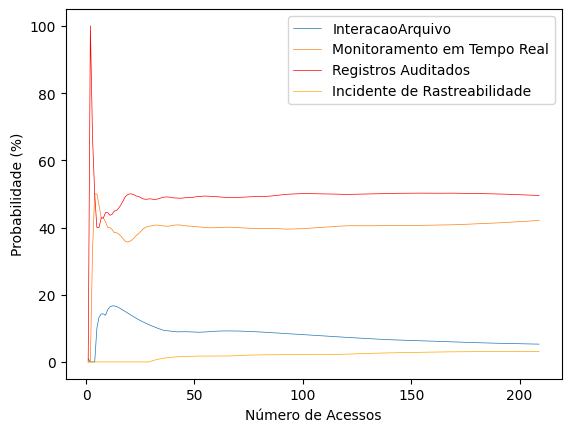

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo os estados do sistema novo
states = ["InteracaoArquivo", "MonitoramentoTempoReal", "RegistrosAuditados", "DetectaIncidente"]

# Possíveis sequências de eventos (nomes das transições)
transitionName = [
    ["IAIA", "IAMT", "IARA", "IADI"],
    ["MTIA", "MTMT", "MTRA", "MTDI"],
    ["RAIA", "RAMT", "RARA", "RADI"],
    ["DIIA", "DIMT", "DIRA", "DIDI"]
]

# Matriz de probabilidades de transição (transitionMatrix)
transitionMatrix = [
    [0.10, 0.90, 0.00, 0.00],     # InteracaoArquivo
    [0.05, 0.04, 0.86, 0.05],     # MonitoramentoTempoReal
    [0.00, 0.70, 0.30, 0.00],     # RegistrosAuditados
    [0.00, 0.00, 0.94, 0.06]      # DetectaIncidente
]

# Definindo a função `activity_forecast` para o sistema novo
def activity_forecast(actions):
    activityAction = "InteracaoArquivo"
    activityList = [activityAction]
    i = 0
    prob = 1

    # Definindo os estados finais
    estados_finais = ["RegistrosAuditados", "DetectaIncidente"]

    while i != actions:

        if activityAction == "InteracaoArquivo":
            change = np.random.choice(transitionName[0], replace=True, p=transitionMatrix[0])
            if change == "IAIA":
                prob *= 0.10
                activityAction = "InteracaoArquivo"
            elif change == "IAMT":
                prob *= 0.90
                activityAction = "MonitoramentoTempoReal"
            elif change == "IARA":
                prob *= 0.00
                activityAction = "RegistrosAuditados"
            elif change == "IADI":
                prob *= 0.00
                activityAction = "DetectaIncidente"

        elif activityAction == "MonitoramentoTempoReal":
            change = np.random.choice(transitionName[1], replace=True, p=transitionMatrix[1])
            if change == "MTIA":
                prob *= 0.05
                activityAction = "InteracaoArquivo"

            elif change == "MTMT":
                prob *= 0.04
                activityAction = "MonitoramentoTempoReal"

            elif change == "MTRA":
                prob *= 0.86
                activityAction = "RegistrosAuditados"

            elif change == "MTDI":
                prob *= 0.05
                activityAction = "DetectaIncidente"

        elif activityAction == "RegistrosAuditados":
            change = np.random.choice(transitionName[2], replace=True, p=transitionMatrix[2])
            if change == "RAIA":
                prob *= 0.00
                activityAction = "InteracaoArquivo"

            elif change == "RAMT":
                prob *= 0.70
                activityAction = "MonitoramentoTempoReal"

            elif change == "RARA":
                prob *= 0.30
                activityAction = "RegistrosAuditados"

            elif change == "RADI":
                prob *= 0.00
                activityAction = "DetectaIncidente"

        elif activityAction == "DetectaIncidente":
            change = np.random.choice(transitionName[3], replace=True, p=transitionMatrix[3])
            if change == "DIIA":
                prob *= 0.00
                activityAction = "InteracaoArquivo"

            elif change == "DIMT":
                prob *= 0.00
                activityAction = "MonitoramentoTempoReal"

            elif change == "DIRA":
                prob *= 0.94
                activityAction = "RegistrosAuditados"

            elif change == "DIDI":
                prob *= 0.06
                activityAction = "DetectaIncidente"

        activityList.append(activityAction)
        i += 1

    return activityList, prob

# Configurações para a simulação e cálculo de probabilidades
list_activity = []
countIA = 0  # InteracaoArquivo
countMT = 0  # MonitoramentoTempoReal
countRA = 0  # RegistrosAuditados
countDI = 0  # DetectaIncidente

eixoX = []
probIA = []
probMT = []
probRA = []
probDI = []

probIA.append(1.0)
probMT.append(0.0)
probRA.append(0.0)
probDI.append(0.0)

Nactions = 210
Ndias = 100

totalSimuladoPredicao = 0

for index in range(1, Nactions):
    eixoX.append(index)

print("====================================================================")
print()
print(f"G2: Simulação com Markov para Sistema Novo")
print(f"     >> Simulação quantidade de dias = {Ndias}")
print(f"     >> Número de acessos por dia = {Nactions}")
print()
print("====================================================================")
print()

for iteractions in range(1, Nactions):
    activity_result, _ = activity_forecast(Ndias)
    list_activity.append(activity_result)

    for smaller_list in list_activity:
        if smaller_list[-1] == "InteracaoArquivo":
            countIA += 1
        elif smaller_list[-1] == "MonitoramentoTempoReal":
            countMT += 1
        elif smaller_list[-1] == "RegistrosAuditados":
            countRA += 1
        elif smaller_list[-1] == "DetectaIncidente":
            countDI += 1

    totalSimuladoPredicao = countIA + countMT + countRA + countDI

    probIA.append((countIA / totalSimuladoPredicao) * 100.0)
    probMT.append((countMT / totalSimuladoPredicao) * 100.0)
    probRA.append((countRA / totalSimuladoPredicao) * 100.0)
    probDI.append((countDI / totalSimuladoPredicao) * 100.0)

# Exibindo os resultados finais de probabilidade
print(f'1. A probabilidade de iniciar no estado "InteracaoArquivo" e terminar no mesmo estado é de ......................: {probIA[-1]:.2f} %')
print(f'2. A probabilidade de iniciar no estado "InteracaoArquivo" e terminar em "Monitoramento em Tempo Real" é de ...............: {probMT[-1]:.2f} %')
print(f'3. A probabilidade de iniciar no estado "InteracaoArquivo" e terminar em "Registros Auditados" é de ...................: {probRA[-1]:.2f} %')
print(f'4. A probabilidade de iniciar no estado "InteracaoArquivo" e terminar em "Incidente de Rastreabilidade" é de ....: {probDI[-1]:.2f} %')
print()

# Gerando o gráfico das probabilidades
plt.plot(eixoX[:Nactions-1], probIA[:Nactions-1], label='InteracaoArquivo', linewidth=0.5)
plt.plot(eixoX[:Nactions-1], probMT[:Nactions-1], label='Monitoramento em Tempo Real', linewidth=0.5)
plt.plot(eixoX[:Nactions-1], probRA[:Nactions-1], label='Registros Auditados', linewidth=0.5, color='red')
plt.plot(eixoX[:Nactions-1], probDI[:Nactions-1], label='Incidente de Rastreabilidade', linewidth=0.5, color='orange')
plt.xlabel("Número de Acessos")
plt.ylabel("Probabilidade (%)")
plt.legend()
plt.show()
